In [184]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def SEIR_eqs(INP, t):
    du = np.zeros((12))
    u = INP
    S1 = u[0] ; S2 = u[1] ; S3 = u[2]
    E1 = u[3] ; E2 = u[4] ; E3 = u[5]
    I1 = u[6] ; I2 = u[7] ; I3 = u[8]
    R1 = u[9] ; R2 = u[10] ; R3 = u[11]
    X = S1 + E1 + I1 + R1
    Y = S2 + E2 + I2 + R2
    Z = S3 + E3 + I3 + R3
    N = X + Y + Z
    du[0] = - ((beta[0,0] * S1 * I1 / N) + (beta[0,1] * S1 * I2 / N) + (beta[0,2] * S1 * I3 / N)) - (landa * S1 * Y / N)
    du[1] = - ((beta[1,0] * S2 * I1 / N) + (beta[1,1] * S2 * I2 / N) + (beta[1,2] * S2 * I3 / N)) + (landa * eta * S2 * X / N) + (beta_so * S2 * Z / N) - (alpha * S2 * Z / N)
    du[2] = - ((beta[2,0] * S3 * I1 / N) + (beta[2,1] * S3 * I2 / N) + (beta[2,2] * S3 * I3 / N)) + (landa * (1 - eta) * S2 * X / N) - (beta_so * S3 * Y / N) + (alpha * S3 * Y / N)
    du[3] = ((beta[0,0] * S1 * I1 / N) + (beta[0,1] * S1 * I2 / N) + (beta[0,2] * S1 * I3 / N)) - sigma[0] * E1 - (landa * E1 * Y / N)
    du[4] = ((beta[1,0] * S2 * I1 / N) + (beta[1,1] * S2 * I2 / N) + (beta[1,2] * S2 * I3 / N)) - sigma[1] * E2 + (landa * eta * E2 * X / N) + (beta_so * E2 * Z / N) - (alpha * E2 * Z / N)
    du[5] = ((beta[2,0] * S3 * I1 / N) + (beta[2,1] * S3 * I2 / N) + (beta[2,2] * S3 * I3 / N)) - sigma[2] * E3 + (landa * (1 - eta) * E2 * X / N) - (beta_so * E3 * Y / N) + (alpha * E3 * Y / N)
    du[6] = (sigma[0] * E1) - (gamma[0] * I1) - (landa * I1 * Y / N)
    du[7] = (sigma[1] * E2) - (gamma[1] * I2) + (landa * eta * X * I2 / N) + (beta_so * I2 * Z / N) - (alpha * I2 * Z / N)
    du[8] = (sigma[2] * E3) - (gamma[2] * I3) + (landa * (1 - eta) * X * I2 / N) - (beta_so * Y * I3 / N) + (alpha * Y * I3 / N)
    du[9] = (gamma[0] * I1) - (landa * Y * R1 / N)
    du[10] = (gamma[1] * I2) + (landa * X * R2 / N) + (beta_so * Z * R2 / N) - (alpha * Z * R2 / N)
    du[11] = (gamma[2] * I3) + (landa * (1 - eta) * X * R3 / N) - (beta_so * Y * R3 / N) + (alpha * Y * R3 / N)
    return du


In [185]:
beta = np.array([[0.1, 0.2, 0.1], [0.15, 0.25, 0.15], [0.1, 0.2, 0.1]])
gamma = [1/14, 1/25, 1/14]
sigma = [0.3333, 0.3333, 0.3333]
INPUT = [100000, 100000, 100000, 0, 0, 0, 80, 10, 10, 0, 0, 0]
alpha = 0.05
beta_so = 0.2
landa = 0.6
eta = 0.8
t_start = 0.0
t_end = 250
t_inc = 0.1
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(SEIR_eqs, INPUT, t_range)


In [186]:
string = """\
    beta = np.array([[0.1, 0.2, 0.1], [0.15, 0.25, 0.15], [0.1, 0.2, 0.1]])
    gamma = [1/14, 1/25, 1/14]
    sigma = [0.3333, 0.3333, 0.3333]
    INPUT = [100000, 100000, 100000, 0, 0, 0, 80, 10, 10, 0, 0, 0]
    alpha = {}
    beta_so = {}
    landa = {}
    eta = {}
"""
with open('Parameters.txt', 'w') as f:
    f.write(string.format(alpha,beta_so,landa,eta))


In [187]:
S_all = RES[:, 0] + RES[:, 1] + RES[:, 2]
E_all = RES[:, 3] + RES[:, 4] + RES[:, 5]
I_all = RES[:, 6] + RES[:, 7] + RES[:, 8]
R_all = RES[:, 9] + RES[:, 10] + RES[:, 11]
G_1 = RES[:, 0] + RES[:, 3] + RES[:, 6] + RES[:, 9]
G_2 = RES[:, 1] + RES[:, 4] + RES[:, 7] + RES[:, 10]
G_3 = RES[:, 2] + RES[:, 5] + RES[:, 8] + RES[:, 11]


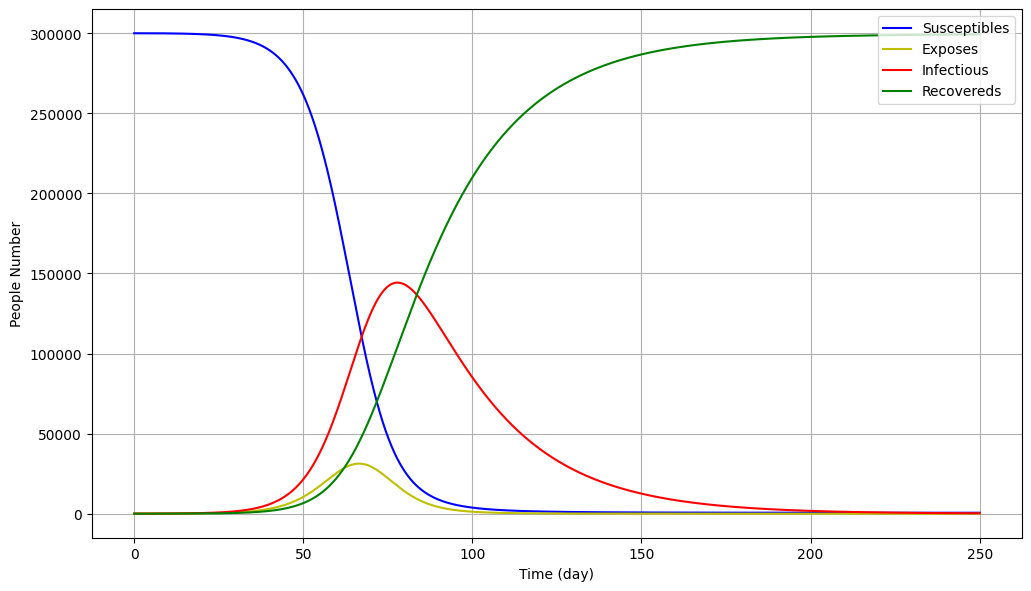

In [188]:
plt.figure(figsize=(12,7), dpi=100)
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('People Number')
plt.plot(t_range, S_all, label='Susceptibles', c = 'b')
plt.plot(t_range, E_all, label='Exposes', c = 'y')
plt.plot(t_range, I_all, label='Infectious', c = 'r')
plt.plot(t_range, R_all, label='Recovereds', c = 'g')
plt.legend(loc = 1)
plt.savefig('ep-gr')


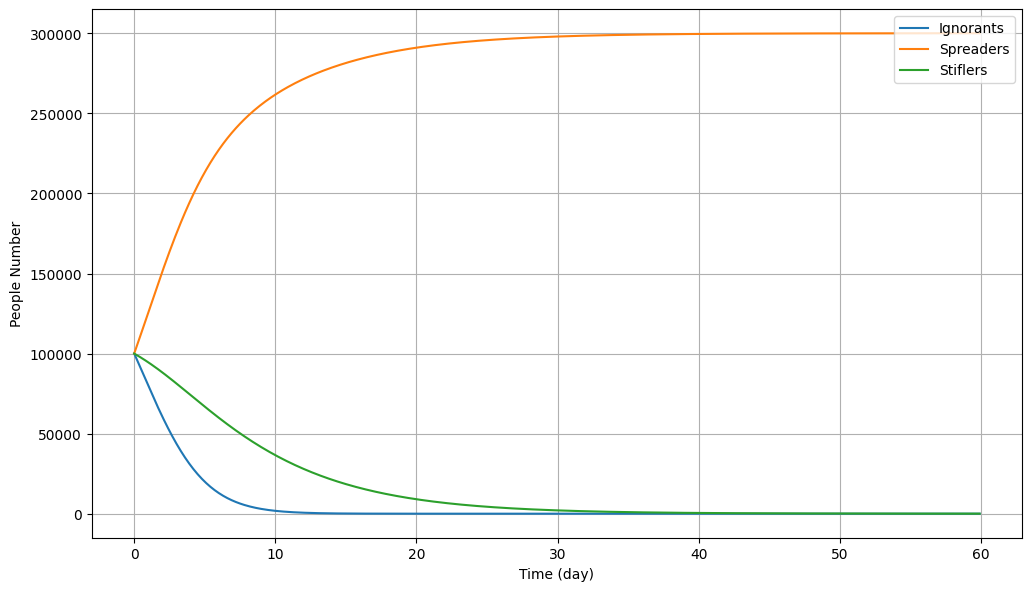

In [189]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('People Number')
plt.plot(t_range[0:600], G_1[0:600], label='Ignorants')
plt.plot(t_range[0:600], G_2[0:600], label='Spreaders')
plt.plot(t_range[0:600], G_3[0:600], label='Stiflers')
plt.legend(loc=1)
plt.savefig('so-gr')


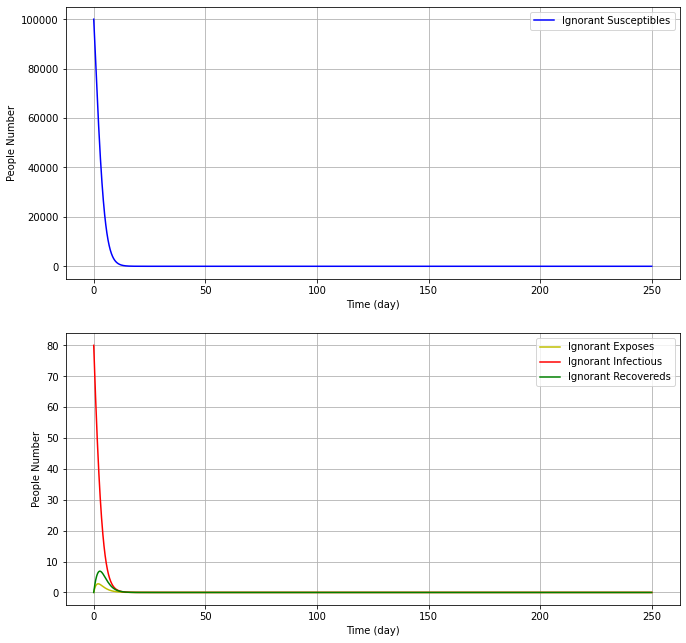

In [190]:
fig, axs = plt.subplots(2, 1, figsize=(11, 11))
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('Time (day)')
axs[0].set_ylabel('People Number')
axs[1].set_xlabel('Time (day)')
axs[1].set_ylabel('People Number')
axs[0].plot(t_range, RES[:, 0], label='Ignorant Susceptibles', c='b')
axs[1].plot(t_range, RES[:, 3], label='Ignorant Exposes', c='y')
axs[1].plot(t_range, RES[:, 6], label='Ignorant Infectious', c='r')
axs[1].plot(t_range, RES[:, 9], label='Ignorant Recovereds', c='g')
axs[0].legend(loc=1)
axs[1].legend(loc=1)
plt.savefig('Ignorant')


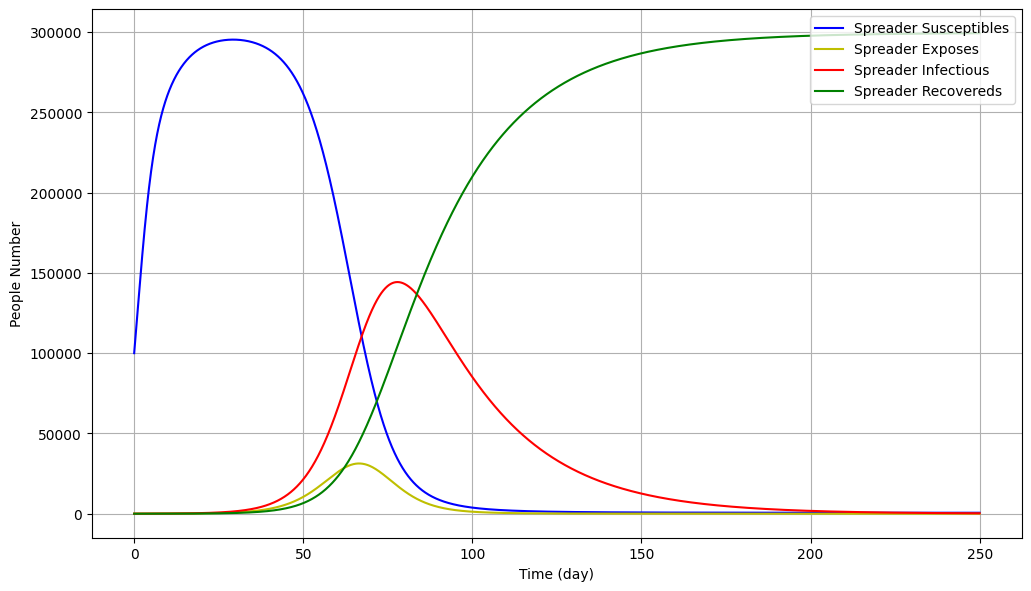

In [191]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('People Number')
plt.plot(t_range, RES[:, 1], label='Spreader Susceptibles', c='b')
plt.plot(t_range, RES[:, 4], label='Spreader Exposes', c='y')
plt.plot(t_range, RES[:, 7], label='Spreader Infectious', c='r')
plt.plot(t_range, RES[:, 10], label='Spreader Recovereds', c='g')
plt.legend(loc=1)
plt.savefig('Spreader')


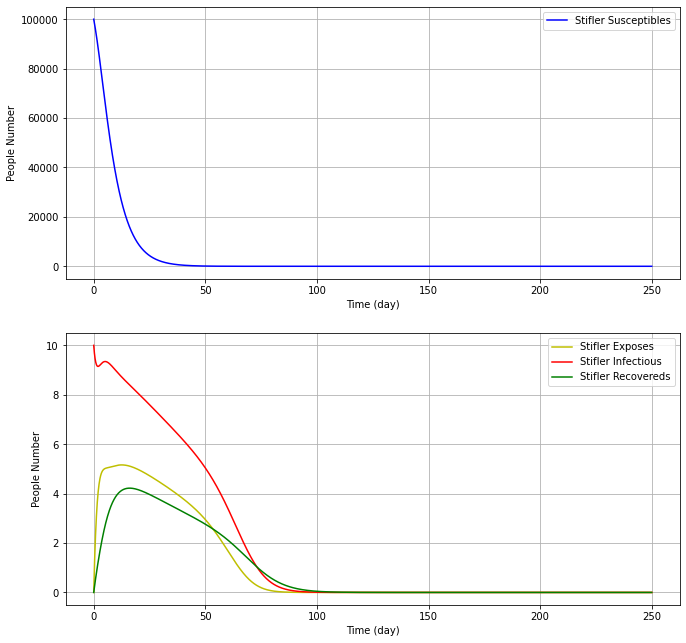

In [192]:
fig, axs = plt.subplots(2, 1, figsize = (11, 11))
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('Time (day)')
axs[0].set_ylabel('People Number')
axs[1].set_xlabel('Time (day)')
axs[1].set_ylabel('People Number')
axs[0].plot(t_range, RES[:, 2], label='Stifler Susceptibles', c='b')
axs[1].plot(t_range, RES[:, 5], label='Stifler Exposes', c='y')
axs[1].plot(t_range, RES[:, 8], label='Stifler Infectious', c='r')
axs[1].plot(t_range, RES[:, 11], label='Stifler Recovereds', c='g')
axs[0].legend(loc=1)
axs[1].legend(loc=1)
plt.savefig('Stifler')
